In [23]:
#writetable("pjtion_corto_mto", df_pjtion_corto_mto, separator='\t');
#writetable("pjtion_largo_mto", df_pjtion_largo_mto, separator='\t');
#writetable("pjtion_portal_mto", df_pjtion_portal_mto, separator='\t');

In [12]:
using DataFrames
using Chemfiles
using Gadfly
using Cairo
using Distributions
using Bio
set_default_plot_size(28cm, 16cm)

In [13]:
function read_ptraj_modes(file, modes_elements)    
    modes_file=open(file, "r")
    modes_text = readdlm(modes_file, skipstart=0, skipblanks=true, 
    ignore_invalid_chars=true, comments=true, comment_char='\*')
    close(modes_file)

    nmodes = modes_text[1, 5]
    ncoords = convert(Int64, modes_elements)
    lines = ceil(Int64, ncoords/7)
    rest = convert(Int64, ncoords % 7)
    
    eval=Array{Float64}(nmodes);
    mode = Array{Float64}(ncoords, nmodes);
    temp1=Array{Float64}(ncoords, 1);
    temp2 = Array{Float64}(ncoords+(7-rest));

    j=lines + 1 + 2 # 1 p/ q lea la prox linea 2 por el header

    for i=1:nmodes
        eval[i] = modes_text[j, 2]
        temp = transpose(modes_text[(j+1):(lines+j), :])
        temp2 = reshape(temp, ncoords+(7-rest))
        for k=(rest+1):7
            pop!(temp2)
        end
    mode[:, i] = temp2
        j = j + lines + 1
    end
    
    for i=1:nmodes
        mode[: ,i] = mode[:, i] / norm(mode[:, i])
    end
    
    return mode, eval
end

read_ptraj_modes (generic function with 1 method)

In [14]:
#Preparo variables
aa3 = 360
aa36 = aa3 - 6
index_mto = collect(6:125) 
index_mto_3 = map(x -> x*3, repeat(index_mto, inner=[3])) - repeat([2, 1, 0], outer = [length(index_mto)]);
pjtion_corto_mto = Array{Float64}(aa36);
pjtion_largo_mto = Array{Float64}(aa36);
pjtion_portal_mto = Array{Float64}(aa36);

In [15]:
# Leo los modos de PCA
modes_mto, evals_mto = read_ptraj_modes("/home/german/labo/16/hemo/run/mto/modes_mto", aa3);

# Leo los vectores gradiente de c/ cavidad
vtor_mto_corto = readdlm("/home/german/labo/16/hemo/cavities/displ/vtores/vtor_mto_corto_0008")
vtor_mto_corto = vtor_mto_corto[index_mto_3]
vtor_mto_corto = vtor_mto_corto / sum(vtor_mto_corto.^2)

vtor_mto_largo = readdlm("/home/german/labo/16/hemo/cavities/displ/vtores/vtor_mto_largo_0008")
vtor_mto_largo = vtor_mto_largo[index_mto_3]
vtor_mto_largo = vtor_mto_largo / sum(vtor_mto_largo.^2)

vtor_mto_portal = readdlm("/home/german/labo/16/hemo/cavities/displ/vtores/vtor_mto_portal_0008");
vtor_mto_portal = vtor_mto_portal[index_mto_3]
vtor_mto_portal = vtor_mto_portal / sum(vtor_mto_portal.^2);

In [16]:
for i=1:aa36
    pjtion_corto_mto[i] = (dot(modes_mto[:, i], vtor_mto_corto))^2
    pjtion_largo_mto[i] = (dot(modes_mto[:, i], vtor_mto_largo))^2
    pjtion_portal_mto[i] = (dot(modes_mto[:, i], vtor_mto_portal))^2
end
df_pjtion_corto_mto = DataFrame(projection = pjtion_corto_mto);
df_pjtion_largo_mto = DataFrame(projection = pjtion_largo_mto);
df_pjtion_portal_mto = DataFrame(projection = pjtion_portal_mto);

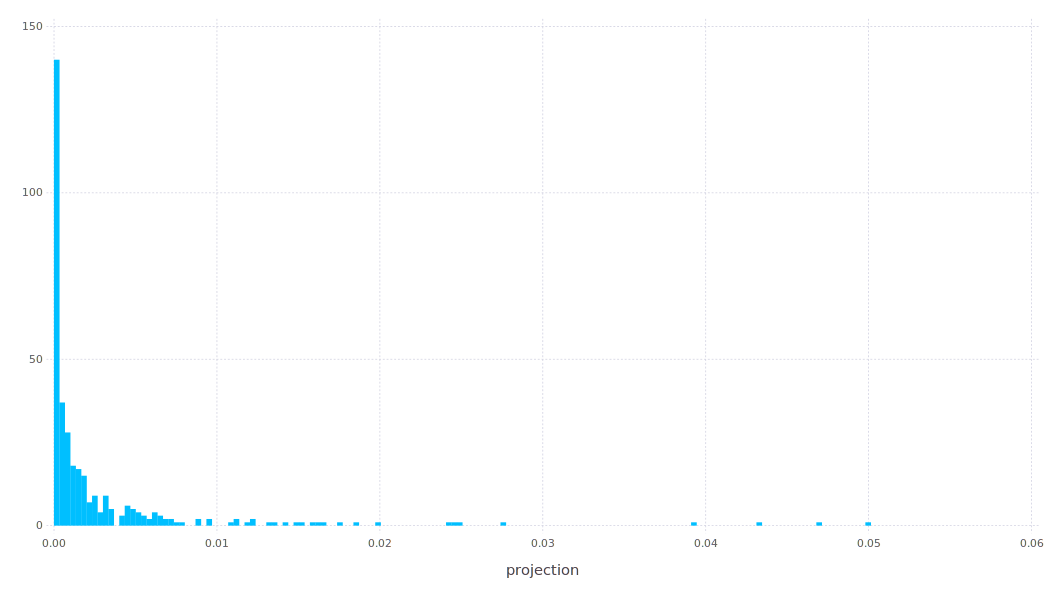

In [17]:
plot(df_pjtion_corto_mto, Geom.histogram, x="projection")

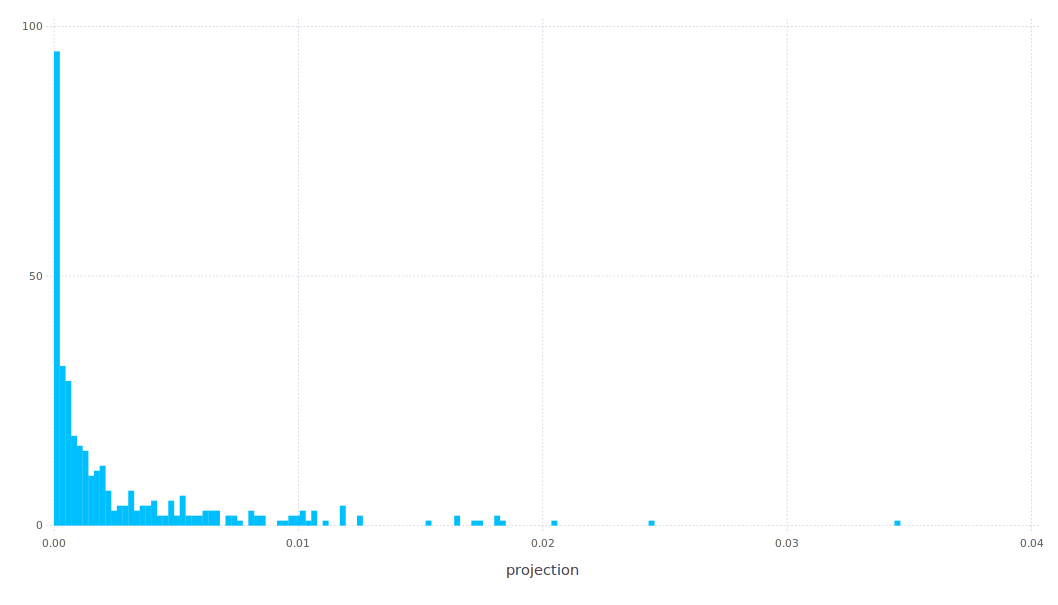

In [18]:
plot(df_pjtion_largo_mto, Geom.histogram, x="projection")

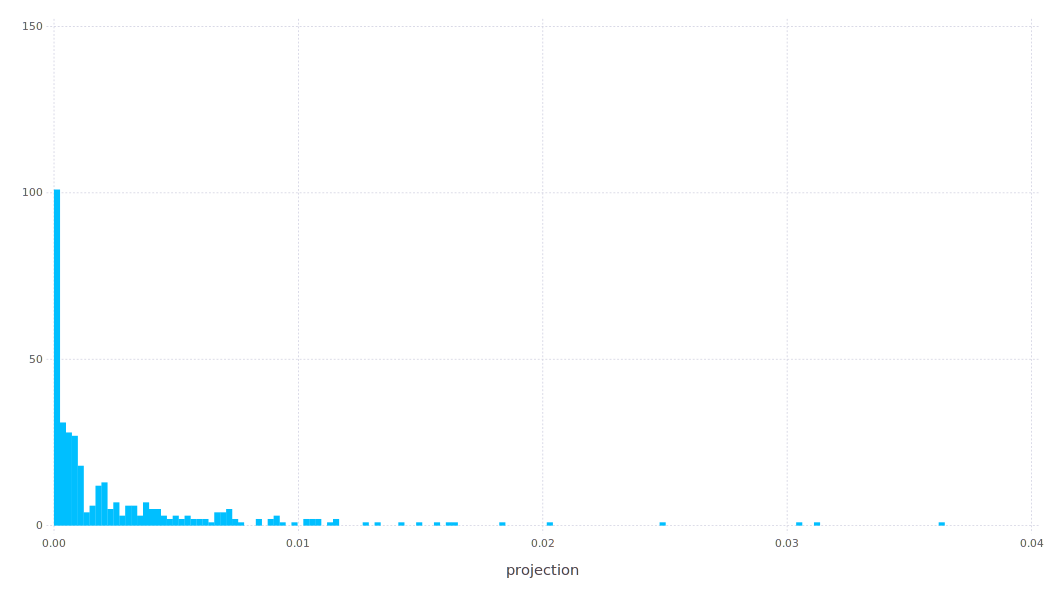

In [19]:
plot(df_pjtion_portal_mto, Geom.histogram, x="projection")

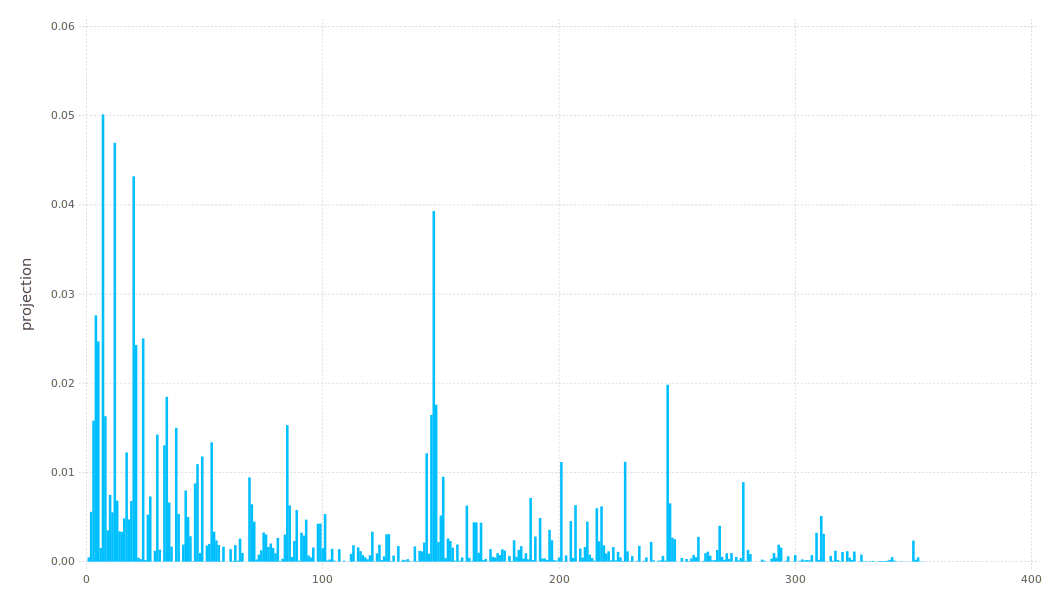

In [20]:
plot(df_pjtion_corto_mto, y="projection", Geom.bar)

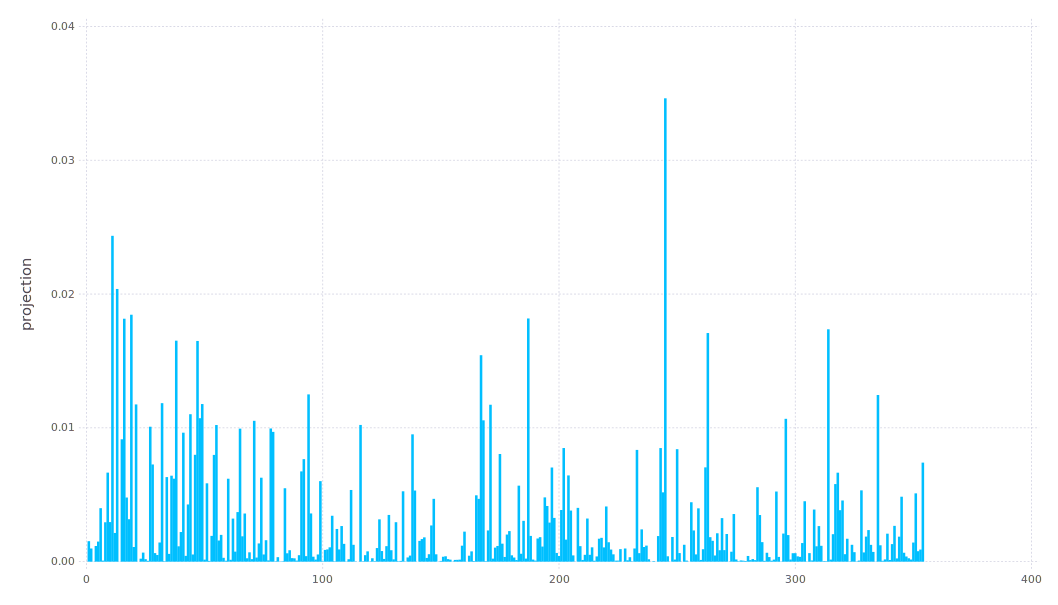

In [21]:
plot(df_pjtion_largo_mto, y="projection", Geom.bar)

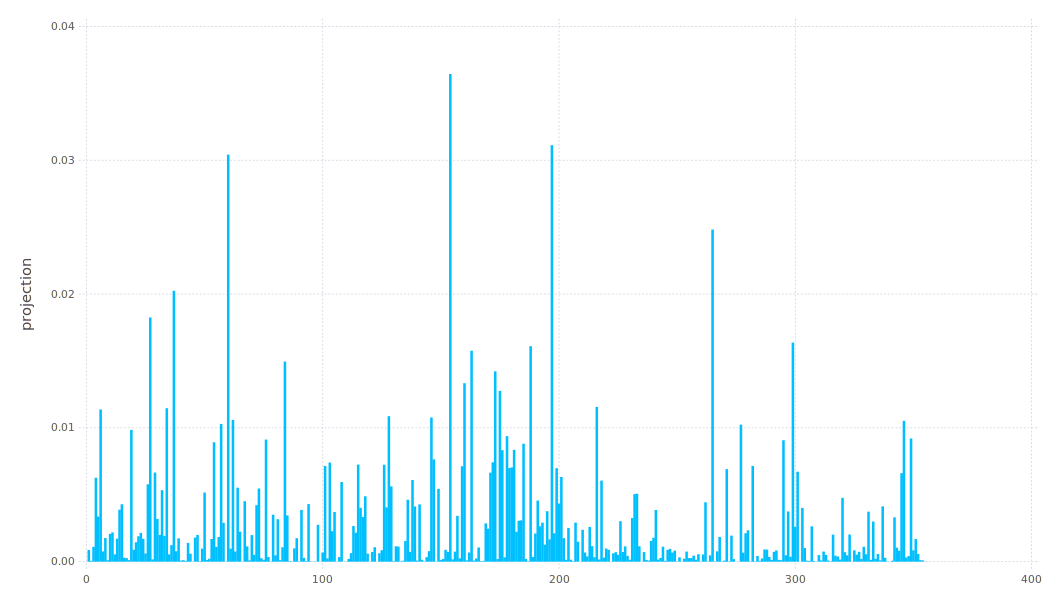

In [22]:
plot(df_pjtion_portal_mto, y="projection", Geom.bar)